In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/scratch/sunwbgt_root/sunwbgt98/xysong/OES-As-Language


In [17]:
import numpy as np
import cv2
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
from collections import Counter
from model import *
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
np.random.seed(2024)
torch.manual_seed(2024)

In [13]:
data_dir = os.path.join('Data', 'simulation-circle-crack')
# Load training
ct_tri = torch.load(os.path.join(data_dir, 'ct.pt'))
sp_tri = torch.load(os.path.join(data_dir, 'sp_2fc.pt'))
print("CT shape: ", ct_tri.shape)
print("SP shape: ", sp_tri.shape)
ct_test = torch.load(os.path.join(data_dir, 'ct-test.pt'))
sp_test = torch.load(os.path.join(data_dir, 'sp_2fc-test.pt'))
print("CT test shape: ", ct_tri.shape)
print("SP test shape: ", sp_tri.shape)

CT shape:  torch.Size([2500, 1, 32, 32])
SP shape:  torch.Size([2500, 16])
CT test shape:  torch.Size([2500, 1, 32, 32])
SP test shape:  torch.Size([2500, 16])


In [41]:
model = torch.load(os.path.join('ckpt', 'model.pt'), map_location=DEVICE)

In [38]:
def visualize(idx):
    sp = sp_test[idx]
    ct = ct_test[idx]
    ct_pred = model(sp.reshape((1, -1, 1)))

    fig, ax = plt.subplots(1, 3,figsize=(15, 5))
    ax[0].imshow(ct.squeeze().numpy())
    ax[1].imshow(ct_pred.squeeze().detach().numpy())
    ax[2].plot(sp)
    print('Recon: ', torch.mean((ct - ct_pred)**2).detach().numpy())

Recon:  0.013180168


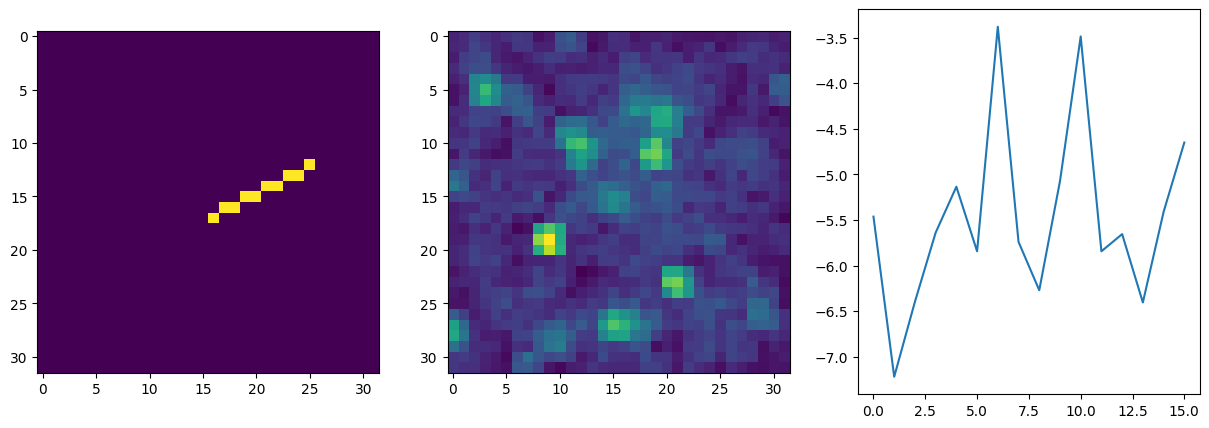

In [42]:
visualize(2)

Recon:  0.025655774


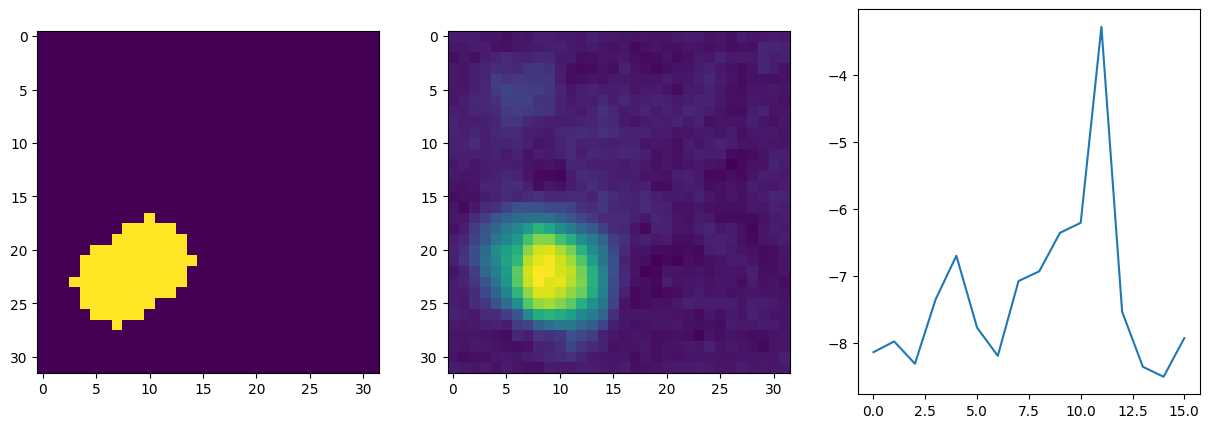

In [44]:
visualize(0)